In [1]:
# Load Modules

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from requests import get
from IPython.display import display, HTML
%matplotlib inline

In [2]:
import requests
import lxml.html as lh
import pandas as pd

In [59]:
# Java code for hiding code inside notebook

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

# Introduction - The Mega Millions

>On October 23rd 2018, someone won one of the largest lottery jackpots in the Mega Millions lottery game.  The lucky winner won 1.537 billion dollars.  One had to wonder - is it worth buying those 2 dollar tickets for a chance at such huge value?  Like many others, I wanted to investigate but from a perspective of probability and economics.

#### I set out to ask some hard questions:
>1. What are the chances of winning the Mega Millions?
2. What are the chances of the Mega Millions to reach the billions again?
2. What is the expected value of playing the Mega Millions?
3. What are the best numbers to play?

# 0. Background - The Rules of the Game

>Before delving into probabilities and economics, it is worth refreshing our minds on the rules of this game.  

#### 0.1 - Cycles starting at 40 million

>The Mega Millions is a lottery game that constantly pools money into its jackpot when nobody wins the top prize.  At the beginning of the cycle, the lottery's jackpot starts at 40 million.  Every Tuesday and Friday, a series of 5 balls, numbered 1 to 70, and a special "Mega Ball", numbered 1 to 25, is randomly drawn from a machine (without replacement).  These numbers are broadcasted and anyone who can match all the numbers wins the jackpot.  When somebody wins the jackpot, the jackpot resets at 40 million

#### 0.2 - Other Rules

>Beyond the jackpot, there are other rules and prizes to encourage players.  There are prizes for matching any one of the balls, and the winning go up for the higher level of balls matched.  Furthermore, there is an optional multiplier number that can be purchased for an additional dollar which will multiply any winnings (excluding the jackpot).

#### 0.3 - Ticket Cost and Recent Rules

>To play the Mega Millions one must pay for a 2 dollar ticket.  In 2017 October 27, the Mega Millions changed their rules to increase the price of a ticket from 1 to 2 dollars.  Furthermore they made it so the balls went to a higher count (from 50 to 70).  These rules were likely put into place to make it so that the jackpot would reach a larger amount and increase the fanfare around the game.

#### 0.4 - Random Drawing

>The balls are randomly drawn from a machine, as seen in the video below.

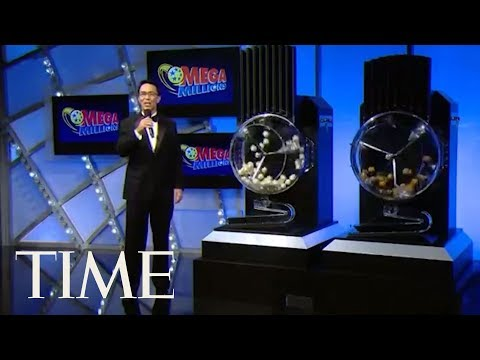

In [329]:
from IPython.display import YouTubeVideo
YouTubeVideo('R0N7tHR8N_c')

## 1. What Are the Chances of Winning?

>This question is fairly simple.  **The chances are 1 in 302,575,350.**

>There is a pool of 70 balls for the first 5 choices of balls, and a total of 25 balls for the last 6th choice.  Therefore we look at the odds of getting all the chosen balls one by one (with no replacement).  The equation below gives us the answer.



$$ \frac{5}{70} * \frac{4}{69} * \frac{3}{68} * \frac{2}{67} * \frac{1}{66} * \frac{1}{25} = \frac{1}{302575350} $$



# 2. What are the chances of the Mega Millions to reach the billions again

#### 3.1 - The game must end

>What are the forces at work causing this jackpot to get so large?  As the jackpot increases in value, and the Mega Millions receives news coverage and publicity, more and more players are attracted to the Mega Millions.  Everyone buys tickets and that money is pooled into the jackpot.  

>When people buy more tickets there is a higher chance of the game ending.  There are only 302,575,350 combinations of numbers possible.  It is quite conceivable that Americans could buy this many tickets and gaurantee that the jackpot is won.

#### 2.2 - Total Number of Tickets Bought per Round

>To get insight into our question above we need to get data on the total number of tickets sold at each cycle for the Mega Millions.  Luckily, the site http://www.lottoreport.com/ticketcomparison.htm records these numbers.

In [3]:
# Meta Data of Dates and Ball Numbers (Stored Locally and Retrieved Online) - http://www.lottoreport.com/ticketcomparison.htm

metadf = pd.read_excel("megametadata.xlsx")

In [4]:
# Function used to scrape data off Mega Millions website

def reader(element1, element2):
    return(tr_elements[element1][element2].text_content())

In [30]:
# Create Main Dataframe and Scrape Data from Mega Millions Website

columnnames= ["5+1","5+1 Amount","5+0","4+1","4+0","3+1","3+0","2+1", "1+1","0+1","5+0+M","4+1+M","4+0+M","3+1+M","3+0+M","2+1+M", "1+1+M","0+1+M"]
df=pd.DataFrame(index=range(metadf["date"].count()),columns=columnnames)

i=0
for lottodate in metadf["date"]:
    
    url='http://www.megamillions.com/winning-numbers/'+str(lottodate.date().strftime('%#m-%#d-%Y'))
    #Create a handle, page, to handle the contents of the website
    page = requests.get(url)
    #Store the contents of the website under doc
    doc = lh.fromstring(page.content)
    #Parse data that are stored between <tr>..</tr> of HTML
    tr_elements = doc.xpath('//tr')
    
    df.iloc[i]=[reader(1,1),reader(1,2),reader(3,1),reader(4,1),reader(5,1),reader(6,1),reader(7,1),reader(8,1), reader(9,1),reader(10,1),reader(3,3),reader(4,3),reader(5,3),reader(6,3),reader(7,3),reader(8,3), reader(9,3),reader(10,3)]
    
    i+=1
    if i == metadf["date"].count():
        break


In [5]:
# Options to retrieve Data Locally

# Save the Data Locally
# df.to_csv("masterlottery.csv")

# Saved Version of Scraped Data on Local Drive 
#  df=pd.read_csv('masterlottery.csv')

In [6]:
# Transfering Excel Data all onto main Dataframe aka df

metadf.index=df.index
df["megaplier"]=metadf["megaplier"]
df["date"]=metadf["date"]
df["ball1"]=metadf["ball1"]
df["ball2"]=metadf["ball2"]
df["ball3"]=metadf["ball3"]
df["ball4"]=metadf["ball4"]
df["ball5"]=metadf["ball5"]
df["megaball"]=metadf["megaball"]
df["totaltickets"]=metadf["totaltickets"]
df["jackpot"]=metadf["jackpot"]

In [7]:
# Create a Special Dataframe Which Doesn't Save things as Strings

numbercolumns=['5+1', '5+0', '4+1', '4+0', '3+1', '3+0','2+1', '1+1', '0+1', '5+0+M', '4+1+M', '4+0+M', '3+1+M', '3+0+M','2+1+M', '1+1+M', '0+1+M']
dfnumeric = pd.read_csv("masterLottery.csv", index_col=0, dtype=np.float64,usecols=numbercolumns,thousands=',')
dfnumeric.index = df.index

NameError: name 'stats' is not defined

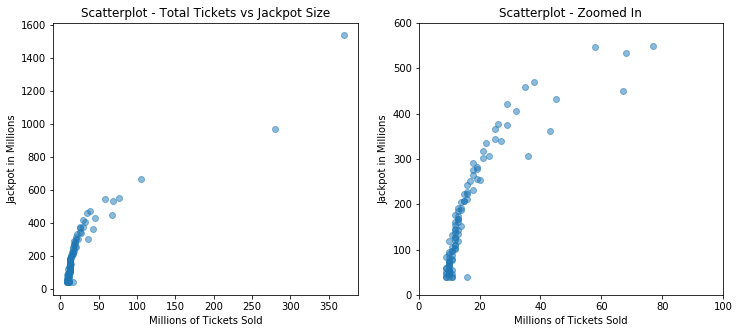

In [8]:
# Tickets Sold and Jackpot Size over Time

test=df.copy()

x = round(test.loc[:,"totaltickets"],-6)
y = test.loc[:,"jackpot"]


fig14 = plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.scatter(x, y, alpha=0.5)
plt.title('Scatterplot - Total Tickets vs Jackpot Size')
plt.xlabel('Millions of Tickets Sold')
plt.ylabel('Jackpot in Millions')
plt.xticks([0,50000000,100000000,150000000,200000000,250000000,300000000,350000000],[0,50, 100, 150, 200, 250, 300, 350])



plt.subplot(1,2,2)
plt.scatter(x, y, alpha=0.5)
plt.title('Scatterplot - Zoomed In')
plt.xlabel('Millions of Tickets Sold')
plt.ylabel('Jackpot in Millions')

plt.ylim(0,600)
plt.xticks([0,20000000,40000000,60000000,80000000,100000000],[0,20,40,60,80,100])
plt.xlim(0,100000000)


plt.text(50000000, 100, "Correlation: "+str(round(stats.pearsonr(x, y)[0],4)), fontdict=None, color='b', withdash=False)
plt.text(50000000, 50, "P Score: "+str(round(stats.pearsonr(x, y)[1],4)), fontdict=None, color='b', withdash=False)

fig.tight_layout() 
plt.show()


In [ ]:
from scipy import stats

stats.linregress(x, y)
round(stats.pearsonr(x, y)[0],4)

#### 2.3 - Graph - Tickets Sold and Jackpot Sizes Over Time

>When we look at the data, we see how the Jackpot and Tickets sold moves over time.  

In [ ]:
# Tickets Sold and Jackpot Size over Time

test=df.copy()


data3 = round(test.loc[:,"totaltickets"],-6)
data4 = test.loc[:,"jackpot"]

fig, ax1 = plt.subplots()
fig.set_size_inches(10, 4)
color = 'tab:red'

ax1.plot(data3, color=color,linewidth=3.2)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis


color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(data4, color=color,linewidth=2.5)
ax2.tick_params(axis='y', labelcolor=color)



    
ax1.set_title("Tickets Sold and Jackpot Size over Time")
ax1.set_xlabel("Dates of Jackpots over 103 Rounds from 27 Oct 2017 to 26 Oct 2018")
ax1.set_ylabel("Millions of Tickets")
ax2.set_ylabel("Millions (Jackpot)")
ax1.set_yticks([0,50000000,100000000,150000000,200000000,250000000,300000000,350000000])
ax1.set_yticklabels([0,50, 100, 150, 200, 250, 300, 350])
ax1.set_xticks([1,27,50,60, 84, 102])
ax1.set_xticklabels(["23-Oct","24-Jul","04-May","30 Mar","05-Jan","27-Oct"])
ax1.set_xlim(102,-2)

    
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

        


#### 2.4 - Probability That The Oct 23 Jackpot Advanced Another Round

In [ ]:
probability=1-(302575349/302575350)**370000000


### $ (\frac{302,575,349}{302,575,350})^{370,000,000} \thicksim 29.4\% $

>There was a 29.4% That the Mega Millions could have advanced another round on October 23 2018.  It would have likely increased 60-80% as it tends do do during the spike stage.  This would have landed the jackpot upwards towards 2.4 to 2.7 billion dollars!  At this point there is no saying how many people would rush to the jackpot, perhaps even diminishing all likelihood for the lottery to continue another round.  

#### 2.5 Relationship Between Tickets Sold and Jackpot Continuity

>Take a look at the graph - as tickets approach the billions, odds approach 0 that the game could advance another round.  For example if 1.6 billion tickets were purchased randomly, there is a 99.5 percent chance somebody has to win the jackpot.  The graph below shows the binomial probability that there are zero jackpot wins (zero successes) based on number of tickets sold.  

In [ ]:
(302575349/302575350)**77367250

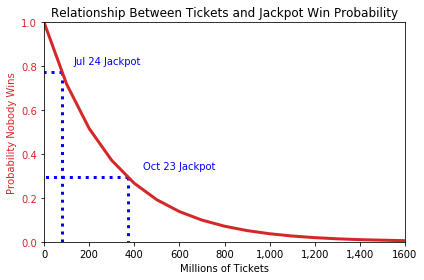

0.005052162122146352

In [9]:
# Create Table and Graph of Probability vs Billions of Players

yax=[0,100000000,200000000,300000000,400000000,500000000,600000000,700000000,800000000,900000000,1000000000,1100000000,1200000000,1300000000,1400000000,1600000000]
xax = [(302575349/302575350)**x for x in yax]

fig5, ax5 = plt.subplots()
fig5.set_size_inches(6, 4)
color = 'tab:red'
ax5.set_xlabel('time (s)')
ax5.set_ylabel('exp', color=color)
ax5.plot(yax,xax, color=color,linewidth=3.0)
ax5.set_title("Relationship Between Tickets and Jackpot Win Probability")
ax5.set_xlabel("Millions of Tickets")
ax5.set_ylabel("Probability Nobody Wins")
ax5.tick_params(axis='y', labelcolor=color)

ax5.set_xticklabels([0,200,400,600,800,"1,000","1,200","1,400","1600"])


ax5.vlines(370000000, .294, 0, Linestyle="dotted",lw=3, color='b')
ax5.hlines(.294,370000000, 0, Linestyle="dotted",lw=3, color='b')
plt.text(440000000, .33, "Oct 23 Jackpot", fontdict=None, color='b', withdash=False)

ax5.vlines(77367250, 0.77437, 0, Linestyle="dotted",lw=3, color='b')
ax5.hlines(0.77437,77367250, 0, Linestyle="dotted",lw=3, color='b')
plt.text(130000000, .81, "Jul 24 Jackpot", fontdict=None, color='b', withdash=False)

plt.xlim([0, 1600000000])
plt.ylim([0,1])

fig5.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
(302575349/302575350)**1600000000

#### 2.6 - Joint Probability of Reaching 1.5 Billion?

When will we see such excitement again with the Mega Millions?  Well there was a joint 7.2 % that it reached this record setting point from July 27 to Octover 23 2018.  Below is a graph that highlights the binomial probability involved in the recent build leading up to the 1.5 Billion Jackpot.

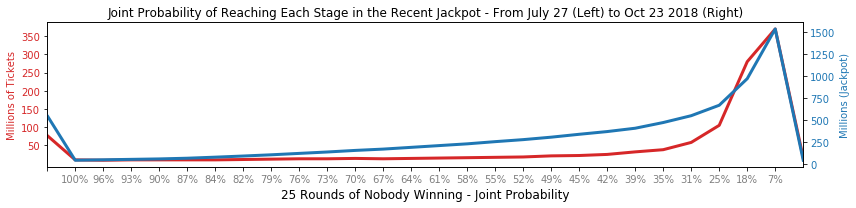

In [10]:
test=df.copy()
def plotdataframe(dataframe1, dataframe2):

    data3 = round(test.loc[:,"totaltickets"],-6)
    data4 = test.loc[:,"jackpot"]

    fig, ax10 = plt.subplots()
    fig.set_size_inches(12, 3)
    color = 'tab:red'
    ax10.set_xlabel('time (s)')
    ax10.set_ylabel('exp', color=color)
    ax10.plot(data3, color=color,linewidth=3.0)
    ax10.tick_params(axis='y', labelcolor=color)

    ax11 = ax10.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax11.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
    ax11.plot(data4, color=color,linewidth=3.0)
    ax11.tick_params(axis='y', labelcolor=color)
    
    
    
    ax10.set_title("Joint Probability of Reaching Each Stage in the Recent Jackpot - From July 27 (Left) to Oct 23 2018 (Right)")
    ax10.set_xlabel("25 Rounds of Nobody Winning - Joint Probability",fontsize=12)
    ax10.set_ylabel("Millions of Tickets")
    ax11.set_ylabel("Millions (Jackpot)")
    ax10.set_yticks([50000000,100000000,150000000,200000000,250000000,300000000,350000000])
    ax10.set_yticklabels([50, 100, 150, 200, 250, 300, 350])
    ax10.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27])
    ax10.set_xticklabels(["7%","18%","25%","31%","35%","39%","42%","45%","49%","52%","55%","58%","61%","64%","67%","70%","73%","76%","79%","82%","84%","87%","90%","93%","96%","100%"],color="grey")
    ax10.set_xlim(27,0)


    
    
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

        
plotdataframe(test, test)

# switch / reverse graph
# use tickets not players
# looking back in weeks

In [11]:
## Calculated Odds Of Continued Success from 07/27/2018 (at 40 million) until 10/23/2018 (at 1.537 billion) -

test['odds'] = test.apply(
    lambda row: (302575349/302575350)**row['totaltickets']
    ,axis=1)

i=0
record3=[]
placer=1
for x in test["odds"]:
    
    placer*=x
    i+=1
    record3.append(placer)
    if i == 25:
        break
        
formatrecord = [ '%.3f' % elem for elem in record3 ]

#### 2.7 - Probability That We Will See a 1.5 Billion Jackpot Again Soon?

If we assume that the Mega Millions maintains its current level of popularity, we will likely see a jackpot of similar size soon.  We already calculated that there was a 7.2% over the course of 88 days (July 27 - Oct 23).  If all periods of 88 days have the same likelihood, then we can use the exponential distribution to calulate the mean.  

$ Mean = \lambda^{-1} = .072^{-1} = 13.88 \> periods \> of \> 88 \> days = \frac{13.88 * 88}{365}  \thicksim 3.35 \> years $

On average we should see an jackpot of similar size every 3.35 years.   

# 3. What is the Expected Value of the Mega Millions?

#### 3.1 - Worthy Investment?

>One has to wonder - Is the Mega Millions a worthwhile investment?  When the jackspot suddenly spikes upward, it seems it has to go into positive expected value territory.  Is the remote chance of winning billions worth more than the 2 dollar ticket price?

#### 3.2 - A Simple Calculation

>For our calculations, we will assume that the lump sum jackpot is chosen to avoid future value calculations, which was 878 millions oppose to the long term 1.47 billion anuity option. Below is a simplified expected value formula which only considers the jackpot: 

$  P(\>Winning\>) * Jackpot - 2\>Dollars = \mathbb{E}(\>Ticket\>) $

$   \frac{1}{302575350} * 878000000 - 2 \thicksim 0.90 $

>We see above that the expected value of a ticket for the Mega Millions is 90 cents per ticket.  That is almost a dollar above the cost of the ticket itself!  But wait - we are not done yet.  We forgot to include that multiple people can win the jackpot.


In [12]:
# Calculate Binomial PMF probabilities for 0, 1, 2, and 3 successes out of 370,000,000 trials.

probabilityzero=(302575349/302575350)**370000000
probabilityone=(1/302575350)*(302575348/302575349)**(370000000-1)*370000000
probabilitytwo=(1/302575350)*(1/302575349)*(302575347/302575348)**(370000000-2)*68449999815000000
probabilitythree=(1/302575350)*(1/302575349)*(1/302575348)*(302575346/302575347)**(370000000-3)*8442166598216670000000000
probabilityfourplus=1-probabilityzero-probabilityone-probabilitytwo-probabilitythree
probabilityfourplus

# Create Probability Table

probtable=pd.DataFrame(data=[probabilityzero, probabilityone, probabilitytwo, probabilitythree, probabilityfourplus,1.00], columns=["Probability"],index=["Zero Winners","One Winner","Two Winners", "Three Winners", "Four or More Winners","Total"])

#### 3.3 - Factoring in Shared Earnings

>Lets calculate the odds for the different number of winners for the recent round on Oct 23 when the Jackpot was 1.5 billion.  Below is a table reflecting the probabilities under the assumption that all people choose numbers randomly.  We use the choose function and the probability mass function (PMF) of a Binomial Distribution to calculate this table.


$\frac{n!}{k!(n-k)!} = \binom{n}{k}\>\>\>\>\>\>\>\>\>- $     Binomial Coefficient / Choose Function     

$\binom{n}{k} * p^k*(1-p)^{n-k} \>\>\>\>\>\>\>\>\>-       $      Binomial Probability Mass Function (PMF)

In [13]:
round(probtable,3)

,Probability
Zero Winners,0.294
One Winner,0.360
Two Winners,0.220
Three Winners,0.090
Four or More Winners,0.036
Total,1.000


#### 3.4 - Recalculating Expected Value

>We can now calculate a more accurate expected value by factoring in the chances of having multiple winners.  The calculations are below:

In [14]:
# Calculate Expected Value (Factoring in Probabilities of Shared Jackpots)

expected=1/302575350*878000000*probabilityzero+1/302575350*878000000/2*probabilityone+1/302575350*878000000/3*probabilitytwo+1/302575350*878000000/4*probabilitythree+1/302575350*878000000/5*probabilityfourplus-2


$ \sum\limits_{n=0}^4 f(n) = \frac{1}{302575350} * \frac{878000000}{n+1} *P(\>n\>Winners\>)  $

$ \mathbb{E}(\>Ticket\>) = \sum\limits_{n=0}^4 f(n) - 2 = -0.324 $


#### 3.5 Negative Expected Value

The expected value of a ticket is negative 32 cents.  That seems to make more sense.  It sounded too good to be true.

# 4. What are the best numbers to play?

#### 4.1 - But In Case you Still Like Gambling

>Some people out there don't care if there is an expected negative value on a purchase.  They want to gamble because its fun.  If this is the case, you might as well play smart.  Is there a smart strategy to Mega Lotteries?  

#### 4.2 - Which Numbers are Lucky?

>People often ask which numbers are lucky.  In fact many websites, including the lottery's site itself, offers data on numbers which have been selected more times than others.  However this is a classic gambling fallacy that the history of a random event will predict future outcomes.  Lets forget about this idea and move on.

#### 4.3 - Which Numbers are Less Played?

>Nonetheless, it is still possible that there are better numbers to play.  How is this?  A key part of the expected value of your ticket depends on the probability that you will have to share your earning.  If you pick numbers that other people pick less, then there is a smaller chance of sharing your earnings.  Lets look at the data to see if some numbered balls are disfavored.

#### 4.4 - Looking at the Data

>We scraped data from the Mega Millions website (http://www.megamillions.com/winning-numbers/).  There is information included on the number of winners for every draw (winners who match any of the 6 numbers).  If certain numbered balls lead to a higher percentage of winners than other numbers, there must be a bias in the how people choose balls.  We will examine the Mega Millions number to see if any numbers, 1 to 25, consistently get more winners.

#### 4.5 - Methodology

>If all numbers are chosen randomly, then there should be a 1/25 chance of any given megaball number.  If the percentage of winners for any round is significantly above or below this percentage, we have reason to be suspicious.  With millions of mega ball matchers every round, any bias should be detectable.  Below is a sample of our findings with T scores.

$ T \>Statistic = \frac{\bar{x} - \mu_ \sigma}{s\>/\sqrt{n}}  $

$Binomial\>Standard\>Deviation = \sigma=\sqrt{n*p*(1-p)}   $


In [15]:
# Perform Calculations to get T scores (accordingly to the T Test equation above)

test["expectedmegawinners"]=round(test["totaltickets"]*1/25,0)
test["actualmegawinners"]=dfnumeric[["4+1","3+1","2+1","1+1","0+1"]].sum(axis=1)
test["discrepancy"]=test["expectedmegawinners"]-test["actualmegawinners"]
test["expectedstd"]=(test["totaltickets"]*1/25*(24/25))**(1/2)
test["actualmean"]=test["actualmegawinners"]/test["totaltickets"]
test["actualstd"]=(test["totaltickets"]*test["actualmean"]*(1-test["actualmean"]))**(1/2)
test["tscores"]=round((test["actualmegawinners"]-test["expectedmegawinners"])/(test["actualstd"]/(test["totaltickets"])**(1/2)),0)


In [245]:
# Reveal Section of the T Score Table

ttables=test[["date","megaball","tscores","actualmean","totaltickets","actualstd","actualmegawinners"]]
Deviations=pd.DataFrame(columns=["std","count"],index=range(0,26))

# For Loop to Collect Standard Deviations for Every MegaBall

for x in range(1,26):
    Deviations.iloc[x,1]=ttables[ttables.megaball==x].count()[2]
    Deviations.iloc[x,0]=ttables[ttables.megaball==x].std()[2]
Deviations


# Create Box Plot Data

def hello(x):
    return(np.array(pd.DataFrame(ttables[ttables["megaball"]==x]["actualmean"])))

boxlist=[]
for y in range(1,25):
    boxlist.append(list(hello(y)))
    
box1=hello(1)
box2=hello(2)
box3=hello(3)
box4=hello(4)
box5=hello(5)
box6=hello(6)
box7=hello(7)
box8=hello(8)
box9=hello(9)
box10=hello(10)
box11=hello(11)
box12=hello(12)
box13=hello(13)
box14=hello(14)
box15=hello(15)
box16=hello(16)
box17=hello(17)
box18=hello(18)
box19=hello(19)
box20=hello(20)
box21=hello(21)
box22=hello(22)
box23=hello(23)
box24=hello(24)
box25=hello(25)
                   


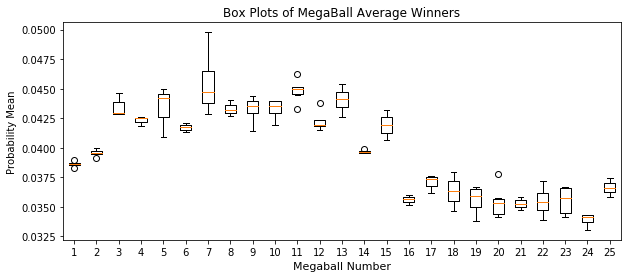

In [142]:
Experiment=pd.DataFrame(columns=range(1,26),index=range(1,10))
Experiment.iloc[1,1]
ttables[ttables.megaball==x].count()[3]
print(ttables[ttables.megaball==1].iloc[5,3])



0.03855454616678425


In [79]:
ttables[ttables.megaball==1]

,date,megaball,tscores,actualmean,totaltickets,actualstd,actualmegawinners
7,2018-10-02,1,-163077.0,0.038725,24684155,958.584572,955902.0
28,2018-07-20,1,-322409.0,0.038612,44752386,1288.897371,1727977.0
51,2018-05-01,1,-64014.0,0.038982,12166631,675.119983,474275.0
60,2018-03-30,1,-468508.0,0.038681,68494654,1595.919460,2649442.0
73,2018-02-13,1,-106039.0,0.038332,12201992,670.665743,467721.0
78,2018-01-26,1,-79821.0,0.038555,10632287,627.788663,409923.0


In [17]:
#Calculate Average Tscore Intensity

averagetscore=abs(ttables["tscores"]).mean()
print("The average absolute value of the T score is "+str(round(averagetscore,0)))

The average absolute value of the T score is 327787.0


#### 4.6 - Large Human Bias

>After calculating the T score we see that they are indeed massive bias towards some numbers.  The absolute value average of the T score for all samples (each round) was 32,000.  With samples that were in the millions, we can reject the null hypothesis in full confidence that balls are chosen randomly by the players in the game.

#### 4.7 - The Least and Most Popular Mega Balls

>Which balls do people favor and disfavor?  Well Ball 24 is the least popular ball and was selected 3.39 % of the time.  Ball 07 is the most popular ball and was selected at 4.55%.  These differences may seem minimal but these really can increase your odds of being a single winner.  For example ball 07 is chosen 34% more often than ball 24.  Below is a list of the most popular balls to least:

In [18]:
# Grouped By Table of Most and Least Popular Balls

groupedtable=ttables.groupby(['megaball'])[('actualmean')].agg(['mean', 'count'])
popularballs=groupedtable.sort_index().sort_values("mean",ascending=False)
popularballs

,mean,count
megaball,,
7,0.045527,4
11,0.044848,6
13,0.044073,4
3,0.043460,5
5,0.043367,3
8,0.043323,3
9,0.043318,7
10,0.043261,4
4,0.042309,3


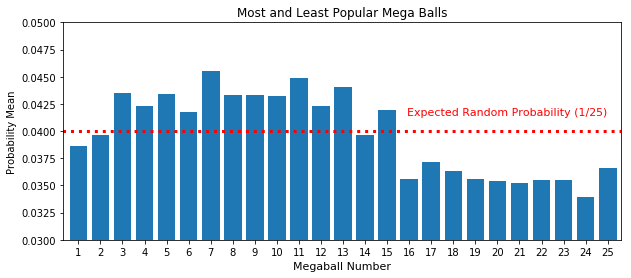

In [19]:
# Bar Graph of Most and Least Popular Mega Balls

fig22, ax22 = plt.subplots()
fig22.set_size_inches(10, 4)
ax22.set_ylim(0.03,0.05)
ax22.set_xlim(.3,25.60)
ax22.hlines(0.04,26, 0, Linestyle="dotted",lw=3, color='r')
ax22.text(15.9, .0415, "Expected Random Probability (1/25)", fontdict=None, color='r',fontsize=11, withdash=False)
ax22.set_title("Most and Least Popular Mega Balls")
ax22.set_xlabel("Megaball Number",fontsize=11)
ax22.set_ylabel("Probability Mean")

ax22.bar(groupedtable.index,groupedtable["mean"],tick_label=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])
plt.show()

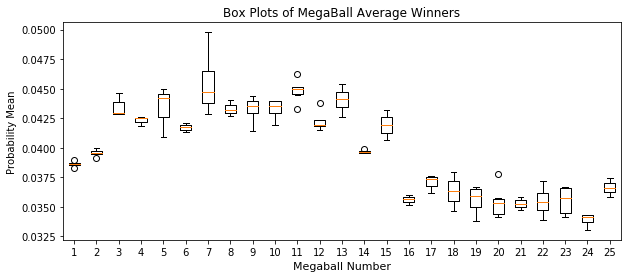

In [252]:
# Create Box Plots Graph

fig92 = plt.figure()
ax92 = fig92.add_subplot(111)
fig92.set_size_inches(10, 4)

ax92.set_title("Box Plots of MegaBall Average Winners")
ax92.set_xlabel("Megaball Number",fontsize=11)
ax92.set_ylabel("Probability Mean")


ax92.boxplot([box1,box2,box3,box4,box5,box6,box7,box8,box9,box10,box11,box12,box13,box14,box15,box16,box17,box18,box19,box20,box21,box22,box23,box24,box25])
plt.show()

 

#### 4.8 - New Expected Value

>If we choose the least popular balls, can this make our expected value of the Mega Millions positive?  Perhaps.  Megaball 24 was 15% less likely to be chosen than our random assumption of 1/25.  If we assume that all balls we choose are 15% less likely to be chosen, we can recalculate our expected value.

#### 4.9 - Odds of Other Players Selecting Disfavored Numbers

>For this calculation we assume that you have chosen the least popular numbers.  We use binomial probabilities to look at the probability that any other players will have also chosen the set of disfavored balls.  These calculations are once again for the  23 Oct 2018 round when the jackpot was nearly 1.5 billion.


$ P_b(\>selecting \>disfavored \>ball\>) = \frac{1}{70} * 0.85 = 0.01214 $

$ P_m(\>selecting \>disfavored \>megaball\>) = \frac{1}{25} * 0.85 = 0.034 $

$ P\>(\>selecting\> 6 \>disfavored \>balls\>) = \frac{5p_b}{1}*\frac{4p_b}{1-p_b}*\frac{3p_b}{1-2p_b}*\frac{2p_b}{1-3p_b}*\frac{p_b}{1-4p_b}*\frac{p_m}{1}   $


#### New Set of Probabilities for Shared Winnings

In [20]:
# Calculate New Binomial Probabilities Under Condition of Disfavored Balls

p=0.01214
pfive=(5*p)*(4*p)/(1-p)*(3*p)/(1-2*p)*(2*p)/(1-3*p)*(1*p)/(1-4*p)
pprobfivemega=pfive*0.034
qprobfivemega=(1-(pprobfivemega))


In [21]:
# Calculate Probabilities for Expected Value and Table

newprobabilityzero=qprobfivemega**370000000
newprobabilityone=pprobfivemega*qprobfivemega**(370000000-1)*370000000
newprobabilitytwo=pprobfivemega*pprobfivemega*qprobfivemega**(370000000-2)*68449999815000000
newprobabilitythree=pprobfivemega*pprobfivemega*pprobfivemega*qprobfivemega**(370000000-3)*8442166598216670000000000
newprobabilityfourplus=1-newprobabilityzero-newprobabilityone-newprobabilitytwo-newprobabilitythree

In [22]:
# Create Probability Table under Condition of Disfavored Numbers

newtotes=probtable.iloc[0:5].sum(axis=0)[0]
newprobtable=pd.DataFrame(data=[newprobabilityzero, newprobabilityone, newprobabilitytwo, newprobabilitythree, newprobabilityfourplus,1], columns=["Probability"],index=["Zero Winners","One Winner","Two Winners", "Three Winners", "Four or More Winners","Total"])
newprobtable["Old Calculation"]=probtable["Probability"]
newprobtable

,Probability,Old Calculation
Zero Winners,0.637329,0.294394
One Winner,0.287097,0.359996
Two Winners,0.064664,0.220108
Three Winners,0.009710,0.089719
Four or More Winners,0.001200,0.035784
Total,1.000000,1.000000


#### 4.10 - New Expected Value

>We See above that the probability of sharing your winnings is much lower if you chose the least common balls.  When we do the math the total **expected value is now 34 cents!**  This means that those 2 dollar tickets are on average worth 2.33 dollars.  However you are still just as unlikely to actually win a jackpot - shared or not.  If you bought 10,000 tickets every day for 120 years, there is almost a 0.4% chance you would win at some point.

In [23]:
newexpected=1/302575350*878000000*newprobabilityzero+1/302575350*878000000/2*newprobabilityone+1/302575350*878000000/3*newprobabilitytwo+1/302575350*878000000/4*newprobabilitythree+1/302575350*878000000/5*newprobabilityfourplus

# 5. Summary

>We have answered our questions and discovered some surprising things.  Below we review the original questions and our answers:

#### 5.1 - What are the chances of winning the Mega Millions?

- 1 in 302,575,350.

#### 5.2 - What are the chances of the Mega Millions to reach the billions again?


- There was a 29.4% that nobody would have won the 1.5 billion jackpot on Oct 23, which would have made the jackpot around 2.4 to 2.8 billion for Oct 26.


- From July 27 to Oct 23, there was a joint 7% chance for the jackpot to reach 1.5 billion


- On average, every 3.3 years we should reach one jackpot of 1.5 billion or larger.

#### 5.3 - What is the expected value of playing the Mega Millions on Oct 23 2018?

- Negative 32.4 Cents under the assumption that players choose their numbers randomly.

#### 5.4 - What are the best numbers to play?

- Ball number 24,21 and 20 are the least popular megaballs and therefore the best numbers to play.

#### 5.5 - What is the expected value of playing disfavored balls on Oct 23 2018? 

- Positive 33.6 cents.  You still have the same impossible odds to win, but are much less likely to have to share your jackpot.
